# [1] - Language Programs Plotted as Points

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
import geodatasets

In [23]:
clean_my_chi_data = pd.read_csv('./clean_my_chi_data.csv')
language_tracking = pd.read_csv('./language_tracking.csv')
comm_areas = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
language_data = pd.read_csv('../Census_Data_-_Languages_spoken_in_Chicago__2008___2012_20241113.csv')

In [24]:
# comm areas cleaning

language_data['Community Area Name'] = language_data['Community Area Name'].str.upper()
#merge comm area shape file with language info to get langauge counts by Community Area
comm_areas = pd.merge(left=comm_areas, 
                   right=language_data.loc[:,['Community Area Name', 'PREDOMINANT NON-ENGLISH LANGUAGE (%)', 'SPANISH', 'POLISH', 'CHINESE']], 
                    left_on=['community'],
                    right_on=['Community Area Name'],
                    how='left')

#create total column
comm_areas['Total Speaking Top 3'] = comm_areas.loc[:,['SPANISH', 'POLISH', 'CHINESE']].apply(lambda row: sum(row), axis=1)

#find the proportion speaking the top 3 languages better than english based on total population
comm_areas['Proportion Speaking Top 3'] = comm_areas['Total Speaking Top 3'] / comm_areas['POP2010']

In [25]:
#create dataframes with location for each program in each of the top three languages
language_and_location = pd.merge(left=clean_my_chi_data.loc[:,['Program ID', 'Latitude', 'Longitude']], 
                   right=language_tracking.loc[:, ['Program ID', 'Spanish', 'Chinese', 'Polish', 'Top 3 Language Indicator']], 
                    left_on=['Program ID'],
                    right_on=['Program ID'],
                    how='left')

polish_program_locations = language_and_location.loc[language_and_location['Polish'] == 1, ['Longitude', 'Latitude']].drop_duplicates()
spanish_program_locations = language_and_location.loc[language_and_location['Spanish'] == 1, ['Longitude', 'Latitude']].drop_duplicates()
chinese_program_locations = language_and_location.loc[language_and_location['Chinese'] == 1, ['Longitude', 'Latitude']].drop_duplicates()
multilingual_program_locations = language_and_location.loc[language_and_location['Top 3 Language Indicator'] == 1, ['Longitude', 'Latitude']].drop_duplicates()

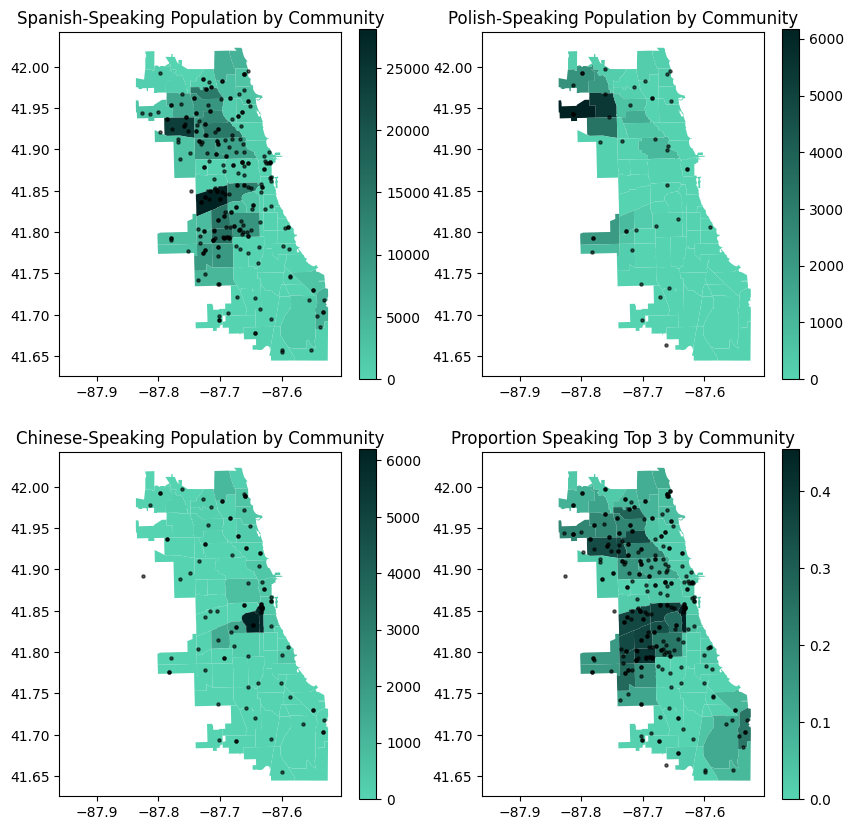

In [26]:
# Create custom colormap
colors = ['#56d4b2', '#002223']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Create figure and axis
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Plot your GeoDataFrame with custom colormap
comm_areas.plot(column='SPANISH', ax=ax[0,0], legend=True, cmap=cmap)
comm_areas.plot(column='POLISH', ax=ax[0,1], legend=True, cmap=cmap)
comm_areas.plot(column='CHINESE', ax=ax[1,0], legend=True, cmap=cmap)
comm_areas.plot(column='Proportion Speaking Top 3', ax=ax[1,1], legend=True, cmap=cmap)

bounds = comm_areas.total_bounds
x_buffer = (bounds[2] - bounds[0]) * 0.05  # 5% buffer on x-axis
y_buffer = (bounds[3] - bounds[1]) * 0.05 

ax[0,0].scatter(spanish_program_locations['Longitude'], spanish_program_locations['Latitude'], s=5, alpha=0.6, color='black', marker='o')
ax[0,0].set_xlim(bounds[0] - x_buffer, bounds[2] + x_buffer)
ax[0,0].set_ylim(bounds[1] - y_buffer, bounds[3] + y_buffer)

ax[0,1].scatter(polish_program_locations['Longitude'], polish_program_locations['Latitude'], s=5, alpha=0.6, color='black', marker='o')
ax[0,1].set_xlim(bounds[0] - x_buffer, bounds[2] + x_buffer)
ax[0,1].set_ylim(bounds[1] - y_buffer, bounds[3] + y_buffer)

ax[1,0].scatter(chinese_program_locations['Longitude'], chinese_program_locations['Latitude'], s=5, alpha=0.6, color='black', marker='o')
ax[1,0].set_xlim(bounds[0] - x_buffer, bounds[2] + x_buffer)
ax[1,0].set_ylim(bounds[1] - y_buffer, bounds[3] + y_buffer)

ax[1,1].scatter(multilingual_program_locations['Longitude'], multilingual_program_locations['Latitude'], s=5, alpha=0.6, color='black', marker='o')
ax[1,1].set_xlim(bounds[0] - x_buffer, bounds[2] + x_buffer)
ax[1,1].set_ylim(bounds[1] - y_buffer, bounds[3] + y_buffer)

# Add title (optional)
ax[0,0].set_title('Spanish-Speaking Population by Community')
ax[0,1].set_title('Polish-Speaking Population by Community')
ax[1,0].set_title('Chinese-Speaking Population by Community')
ax[1,1].set_title('Proportion Speaking Top 3 by Community')

plt.show()